## Tensor
- rank: 축의 개수
- shape: 형상(각 축에 따른 차원 개수)
- type: data type

In [1]:
import numpy as np
import tensorflow as tf


### 0D Tensor(Scalar)
- 하나의 숫자를 담고 있는 tensor
- 축과 형상이 없음

In [4]:
t0 = tf.constant(1)
print(t0)
print(tf.rank(t0))

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)


### 1D Tensor(Vector)
- 값들을 저장한 리스트와 유사한 tensor
- 하나의 축이 존재

In [5]:
t1 = tf.constant([1, 2, 3])
print(t1)
print(tf.rank(t1))

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


### 2D Tensor(Matrix)
- 행렬과 같은 모양으로 두개의 축이 존재
- 일반적인 수치, 통계 데이터셋이 해당
- 주로 samples와 features를 가진 구조로 사용

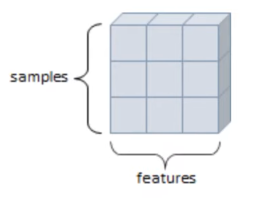

In [6]:
t2 = tf.constant([[1, 2, 3],
                  [4, 5, 6], 
                  [7, 8, 9]])
print(t2)
print(tf.rank(t2))
 

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


### 3D Tensor
- cube와 같은 모양으로 세개의 축이 존재
- 데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당
- 주식 가격 데이터셋, 시간에 따른 질병 발병 데이터 등이 존재
- 주로 samples, timesteps, features 를 가진 구조로 사용

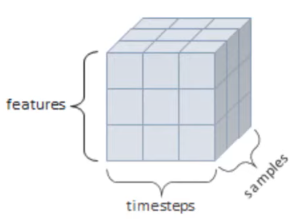

In [7]:
t3 = tf.constant([[[1, 2, 3], 
                   [4, 5, 6], 
                   [7, 8, 9]],  
                  [[1, 2, 3], 
                   [4, 5, 6], 
                   [7, 8, 9]],  
                  [[1, 2, 3], 
                   [4, 5, 6], 
                   [7, 8, 9]]])
print(t3)
print(tf.rank(t3))

tf.Tensor(
[[[1 2 3]
  [4 5 6]
  [7 8 9]]

 [[1 2 3]
  [4 5 6]
  [7 8 9]]

 [[1 2 3]
  [4 5 6]
  [7 8 9]]], shape=(3, 3, 3), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


### 4D Tensor
- 4개의 축
- 컬러 이미지 데이터가 대표적 사례(흑백 이미지 데이터는 3D Tensor로 가능)
- 주로 samples, height, width, 컬러 channel을 가진 구조로 사용
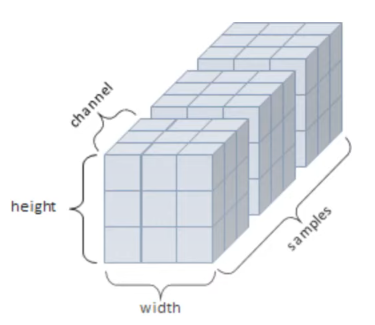

### 5D Tensor
- 5개의 축
- 비디오 데이터가 대표 사례
- 주로 samples, frames, height, width, 컬러 channel을 가진 구조로 사용

### Tensor Data Type
- tensor의 기본 dtype
    - 정수형 텐서: int32
    - 실수형 텐서: float32
    - 문자열 텐서: string
- int32, float32, string 타입 외에도 float16, int8 타입등이 존재
- 연산시 텐서의 타입 일치 필요
- 타입변환에는 tf.cast() 사용

In [8]:
i = tf.constant(2)
print(i)

tf.Tensor(2, shape=(), dtype=int32)


In [10]:
f = tf.constant(2.)
print(f)

tf.Tensor(2.0, shape=(), dtype=float32)


In [11]:
s = tf.constant('Suan')
print(s)

tf.Tensor(b'Suan', shape=(), dtype=string)


In [12]:
f16 = tf.constant(2., dtype=tf.float16)
print(f16)

tf.Tensor(2.0, shape=(), dtype=float16)


In [14]:
i8 = tf.constant(2, dtype=tf.int8)
print(i8)

tf.Tensor(2, shape=(), dtype=int8)


In [15]:
f32 = tf.cast(f16, tf.float32)
print(f32)

tf.Tensor(2.0, shape=(), dtype=float32)


In [16]:
i32 = tf.cast(i8, tf.int32)
print(i32)

tf.Tensor(2, shape=(), dtype=int32)


## Tensor 연산

In [22]:
print(tf.constant(2) + tf.constant(2))
print(tf.constant(2) - tf.constant(2))
print(tf.add(tf.constant(2), tf.constant(2)))
print(tf.subtract(tf.constant(2), tf.constant(2)))

tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)


In [23]:
print(tf.constant(2) * tf.constant(2))
print(tf.constant(2) / tf.constant(2))
print(tf.multiply(tf.constant(2), tf.constant(2)))
print(tf.divide(tf.constant(2), tf.constant(2)))

tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(1.0, shape=(), dtype=float64)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(1.0, shape=(), dtype=float64)


In [ ]:
# print(tf.constant(2) + tf.constant(2.2) # 에러남 타입이 달라서

In [27]:
print(tf.cast(tf.constant(2), tf.float32) + tf.constant(2.2))

tf.Tensor(4.2, shape=(), dtype=float32)


## 딥러닝 구조와 학습
- 모델(네트워크)를 구성하는 layer
- 입력 데이터와 그에 대한 목적(결과)
- 학습시에 사용할 피드백을 정의하는 손실 함수(loss function)
- 학습 진행 방식을 결정하는 옵티마이저(optimizer)

### Layer
- 신경망의 핵심 데이터 구조
- 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력하는 데이터 처리 모듈
- 상태가 없는 레이어도 있지만 대부분 가중치(weight)라는 레이어 상태를 가짐
- 가중치는 확률적 경사 하강법에 의해 학습되는 하나 이상의 텐서